In [9]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('data.csv', encoding='cp1252')


print(df.columns)


x = df['no2'].dropna().values

print("Number of samples:", len(x))




Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
Number of samples: 419509


/tmp/ipython-input-883860209.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='cp1252')


In [12]:

#step 1
r = 102317059



a_r = 0.05 * (r % 7)
b_r = 0.3 * (r % 5 + 1)


print("a_r =", a_r)
print("b_r =", b_r)



z = x + a_r * np.sin(b_r * x)




a_r = 0.25
b_r = 1.5


In [ ]:

# STEP 2



# Mean (μ)
mu = np.mean(z)


# Variance (σ^2)
sigma_sq = np.mean((z - mu) ** 2)


# Lambda (λ)
lam = 1 / (2 * sigma_sq)


# Normalization constant (c)
c = np.sqrt(lam / np.pi)


Learned PDF Parameters
μ (mu) = 25.818063543032295
λ (lambda) = 0.0014617052940514906
c = 0.021570239817484047


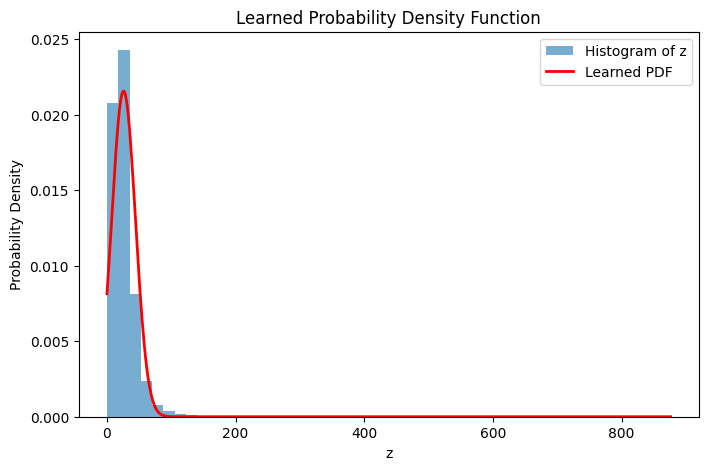

In [15]:
#step3

print("\nLearned PDF Parameters")
print("μ (mu) =", mu)
print("λ (lambda) =", lam)
print("c =", c)





plt.figure(figsize=(8,5))
plt.hist(z, bins=50, density=True, alpha=0.6, label='Histogram of z')



z_vals = np.linspace(min(z), max(z), 500)
pdf_vals = c * np.exp(-lam * (z_vals - mu)**2)


plt.plot(z_vals, pdf_vals, 'r', linewidth=2, label='Learned PDF')
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.title('Learned Probability Density Function')
plt.legend()
plt.show()